In [1]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
#transform images so that they can be understodd by the model
transform = transforms.Compose(
    [transforms.ToTensor(), #converts image into a tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] #adjust tensor value so that mean = 0, stddev = 0.5
)

#many more transformation: cropping, rotating, etc

In [4]:
#Use CIFAR10 dataset which is 60000 images of 10 classes
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data


In [3]:
#for debugging
print(torch.__version__)
print(torchvision.__version__)

2.0.0
0.15.0


In [5]:
#downloadable sets in pytorch are under the torch.utils.data.Dataset package
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)


truck plane  ship   dog


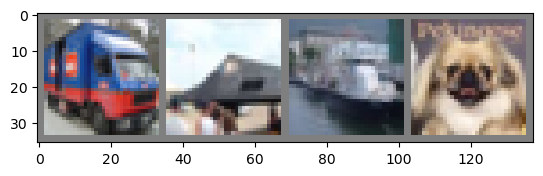

In [7]:
#testing model
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))